<a href="https://colab.research.google.com/github/imabari/rakuten_tools/blob/main/rakuten_tac_cities_best3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.esrij.com/cgi-bin/wp/wp-content/uploads/2012/10/japan_ver84.zip

--2022-06-11 23:56:53--  https://www.esrij.com/cgi-bin/wp/wp-content/uploads/2012/10/japan_ver84.zip
Resolving www.esrij.com (www.esrij.com)... 180.235.251.136
Connecting to www.esrij.com (www.esrij.com)|180.235.251.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6180600 (5.9M) [application/zip]
Saving to: ‘japan_ver84.zip’

japan_ver84.zip     100%[===================>]   5.89M  2.44MB/s    in 2.4s    

2022-06-11 23:56:57 (2.44 MB/s) - ‘japan_ver84.zip’ saved [6180600/6180600]



In [2]:
!pip install geopandas
!pip install rtree
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 15.2 MB/s 
     |████████████████████████████████| 6.3 MB 44.3 MB/s 
     |████████████████████████████████| 16.7 MB 218 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 24.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 31.1 MB/s 


In [3]:
!pip install -U pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd
import pandas as pd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [5]:
# 解像度
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200

In [6]:
japan = gpd.read_file("japan_ver84.zip!japan_ver84")

In [7]:
# 都道府県番号
japan["PREF"] = japan["JCODE"].str[:2]

In [8]:
# 郡と市区町村名を結合
japan["CITY"] = japan[["GUN", "SEIREI", "SIKUCHOSON"]].fillna("").apply(lambda s: "".join(s), axis=1)

In [9]:
japan

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,geometry,PREF,CITY
0,01101,北海道,石狩振興局,None,札幌市,中央区,"Sapporo-shi, Chuo-ku",239944,146024,0.542590,0.005128,"POLYGON ((141.34233 43.06682, 141.35520 43.068...",01,札幌市中央区
1,01102,北海道,石狩振興局,None,札幌市,北区,"Sapporo-shi, Kita-ku",286054,153908,0.567773,0.007031,"POLYGON ((141.40839 43.18395, 141.40427 43.182...",01,札幌市北区
2,01103,北海道,石狩振興局,None,札幌市,東区,"Sapporo-shi, Higashi-ku",262298,144421,0.397203,0.006289,"POLYGON ((141.44698 43.15513, 141.44860 43.153...",01,札幌市東区
3,01104,北海道,石狩振興局,None,札幌市,白石区,"Sapporo-shi, Shiroishi-ku",214050,124710,0.308211,0.003815,"POLYGON ((141.46569 43.10000, 141.46812 43.097...",01,札幌市白石区
4,01105,北海道,石狩振興局,None,札幌市,豊平区,"Sapporo-shi, Toyohira-ku",224435,129875,0.428316,0.005101,"POLYGON ((141.38479 43.04660, 141.38558 43.047...",01,札幌市豊平区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,47362,沖縄県,None,島尻郡,None,八重瀬町,Yaese-cho,31882,12618,0.288020,0.002441,"MULTIPOLYGON (((127.76117 26.12400, 127.76255 ...",47,島尻郡八重瀬町
1903,47375,沖縄県,None,宮古郡,None,多良間村,Tarama-son,1103,520,0.247357,0.001956,"MULTIPOLYGON (((124.73021 24.64206, 124.73135 ...",47,宮古郡多良間村
1904,47381,沖縄県,None,八重山郡,None,竹富町,Taketomi-cho,4300,2483,2.158236,0.029741,"MULTIPOLYGON (((123.76601 24.06841, 123.76380 ...",47,八重山郡竹富町
1905,47382,沖縄県,None,八重山郡,None,与那国町,Yonaguni-cho,1697,953,0.314766,0.002570,"MULTIPOLYGON (((123.00349 24.47277, 123.00128 ...",47,八重山郡与那国町


In [10]:
df0 = pd.read_json("https://cellmap.rukihena.com/mls44011.json")
df0

,lat,lon,area,cell,unit,range,samples,created,updated
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459
...,...,...,...,...,...,...,...,...,...
107937,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058
107938,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550
107939,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222
107940,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550


In [11]:
# 条件抽出
df1 = df0.query("(0x400000 < cell < 0xD800000) & (unit < 390) & (samples > 1)").copy()
df1

,lat,lon,area,cell,unit,range,samples,created,updated
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459
...,...,...,...,...,...,...,...,...,...
107756,34.339877,132.501805,65024,156470036,81,150,2,1632136952,1632136952
107775,34.610366,132.320544,65024,156475144,52,299,8,1640512614,1651741974
107803,34.215942,132.199434,65056,160666639,209,82,4,1651319713,1651319713
107850,34.214605,133.063686,65152,190029585,0,609,32,1651291943,1651291943


In [12]:
# 日時に変換
df1["created"] = pd.to_datetime(df1["created"], unit="s")
df1["updated"] = pd.to_datetime(df1["updated"], unit="s")

In [13]:
# 緯度経度をgeometryに変換
pt_df = gpd.GeoDataFrame(df1, geometry = gpd.points_from_xy(df1.lon, df1.lat), crs="EPSG:6668")
pt_df

,lat,lon,area,cell,unit,range,samples,created,updated,geometry
0,35.673958,139.447787,1,51200257,1,23,2,2022-04-30 01:33:52,2022-04-30 01:33:52,POINT (139.44779 35.67396)
1,34.684203,135.764690,1,67932160,7,74,3,2022-04-30 08:35:28,2022-04-30 08:35:28,POINT (135.76469 34.68420)
2,34.722659,135.726660,1,68311395,17,76,4,2022-03-08 05:35:00,2022-03-08 05:35:00,POINT (135.72666 34.72266)
3,34.708910,135.711737,1,68445141,15,37,2,2022-03-08 05:35:00,2022-03-08 05:35:00,POINT (135.71174 34.70891)
4,34.620415,135.686617,1,68665311,38,71,3,2022-04-07 06:20:59,2022-04-07 06:20:59,POINT (135.68662 34.62042)
...,...,...,...,...,...,...,...,...,...,...
107756,34.339877,132.501805,65024,156470036,81,150,2,2021-09-20 11:22:32,2021-09-20 11:22:32,POINT (132.50180 34.33988)
107775,34.610366,132.320544,65024,156475144,52,299,8,2021-12-26 09:56:54,2022-05-05 09:12:54,POINT (132.32054 34.61037)
107803,34.215942,132.199434,65056,160666639,209,82,4,2022-04-30 11:55:13,2022-04-30 11:55:13,POINT (132.19943 34.21594)
107850,34.214605,133.063686,65152,190029585,0,609,32,2022-04-30 04:12:23,2022-04-30 04:12:23,POINT (133.06369 34.21461)


In [14]:
# geometryから市町村名を取得
spj = gpd.sjoin(pt_df, japan, op="within")
spj

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,lat,lon,area,cell,unit,range,samples,created,updated,geometry,...,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,PREF,CITY
0,35.673958,139.447787,1,51200257,1,23,2,2022-04-30 01:33:52,2022-04-30 01:33:52,POINT (139.44779 35.67396),...,None,None,国立市,Kunitachi-shi,76371,38642,0.159310,0.000812,13,国立市
42768,35.685717,139.421523,13314,71677960,11,1533,112,2021-03-14 02:36:37,2022-05-14 04:55:34,POINT (139.42152 35.68572),...,None,None,国立市,Kunitachi-shi,76371,38642,0.159310,0.000812,13,国立市
43449,35.684870,139.449018,13315,71668489,308,4123,117,2021-02-18 07:20:17,2022-05-14 04:55:34,POINT (139.44902 35.68487),...,None,None,国立市,Kunitachi-shi,76371,38642,0.159310,0.000812,13,国立市
43604,35.672509,139.440929,13315,71675913,113,2038,809,2021-03-03 23:24:49,2022-05-28 01:38:48,POINT (139.44093 35.67251),...,None,None,国立市,Kunitachi-shi,76371,38642,0.159310,0.000812,13,国立市
43647,35.686288,139.426994,13315,71677962,338,4091,690,2021-03-20 13:43:51,2022-06-07 21:06:13,POINT (139.42699 35.68629),...,None,None,国立市,Kunitachi-shi,76371,38642,0.159310,0.000812,13,国立市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105773,24.775525,125.285885,49154,218123269,356,724,32,2022-03-28 03:36:56,2022-03-28 03:36:56,POINT (125.28589 24.77552),...,None,None,宮古島市,Miyakojima-shi,55577,28370,1.813391,0.018247,47,宮古島市
105775,24.823272,125.169252,49154,218127877,14,1190,25,2022-03-27 10:20:59,2022-03-27 10:20:59,POINT (125.16925 24.82327),...,None,None,宮古島市,Miyakojima-shi,55577,28370,1.813391,0.018247,47,宮古島市
105776,24.825154,125.158236,49154,218127878,13,870,23,2022-03-27 10:20:59,2022-03-27 10:20:59,POINT (125.15824 24.82515),...,None,None,宮古島市,Miyakojima-shi,55577,28370,1.813391,0.018247,47,宮古島市
105761,24.356986,124.124868,49154,218109195,288,47,20,2021-07-12 22:21:51,2021-07-12 22:21:51,POINT (124.12487 24.35699),...,None,None,石垣市,Ishigaki-shi,49848,25270,1.674438,0.020441,47,石垣市


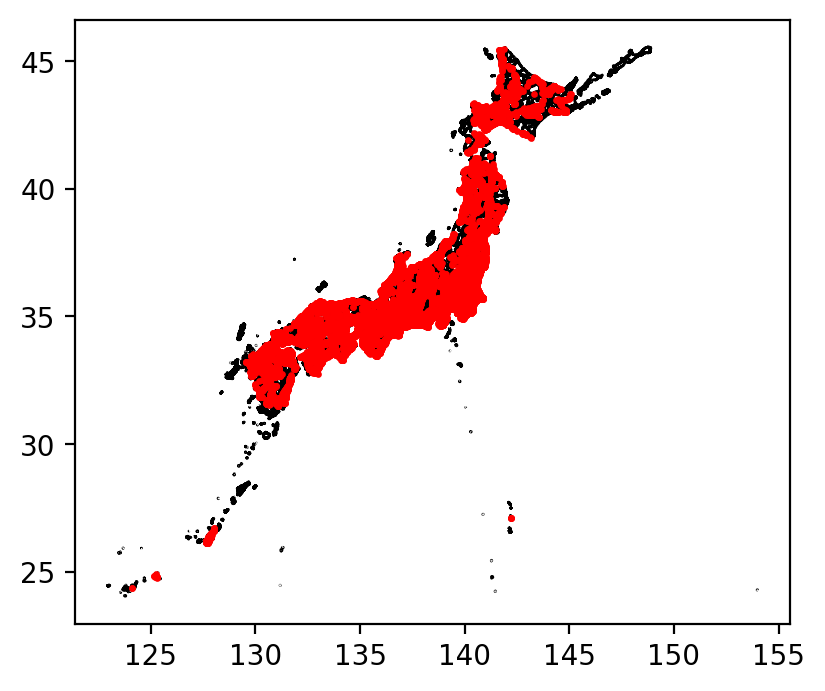

In [15]:
base = japan.plot(color="white", edgecolor="black")
spj.plot(ax=base, marker="o", color="red", markersize=2)

In [16]:
df2 = spj.pivot_table(index=["PREF", "KEN", "JCODE", "CITY"], columns="area", values="cell", aggfunc=len, fill_value=0)
df2

area                    1      70     111    112    113    114    211    \
PREF KEN JCODE CITY                                                       
01   北海道 01101 札幌市中央区       0      0      0      0      0      0      0   
         01102 札幌市北区        0      0      0      0      0      0      0   
         01103 札幌市東区        0      0      0      0      0      0      0   
         01104 札幌市白石区       0      0      0      0      0      0      0   
         01105 札幌市豊平区       0      0      0      0      0      0      0   
...                       ...    ...    ...    ...    ...    ...    ...   
47   沖縄県 47328 中頭郡中城村       0      0      0      0      0      0      0   
         47329 中頭郡西原町       0      0      0      0      0      0      0   
         47348 島尻郡与那原町      0      0      0      0      0      0      0   
         47350 島尻郡南風原町      0      0      0      0      0      0      0   
         47362 島尻郡八重瀬町      0      0      0      0      0      0      0   

area                    212    213    214    ...  64192  64224  64288  64384  \
PREF KEN JCODE CITY                          ...                               
01   北海道 01101 札幌市中央区       0      0      0  ...      0      0      0      0   
         01102 札幌市北区        0      0      0  ...      0      0      0      0   
         01103 札幌市東区        0      0      0  ...      0      0      1      0   
         01104 札幌市白石区       0      0      0  ...      0      0      0      0   
         01105 札幌市豊平区       0      0      0  ...      0      0      0      0   
...                       ...    ...    ...  ...    ...    ...    ...    ...   
47   沖縄県 47328 中頭郡中城村       0      0      0  ...      0      0      0      0   
         47329 中頭郡西原町       0      0      0  ...      0      0      0      0   
         47348 島尻郡与那原町      0      0      0  ...      0      0      0      0   
         47350 島尻郡南風原町      0      0      0  ...      0      0      0      0   
         47362 島尻郡八重瀬町      0      0      0  ...      0      0      0      0   

area                    64416  64512  65024  65056  65152  65440  
PREF KEN JCODE CITY                                               
01   北海道 01101 札幌市中央区       0      0      0      0      0      0  
         01102 札幌市北区        0      0      0      0      0      0  
         01103 札幌市東区        0      0      0      0      0      0  
         01104 札幌市白石区       0      0      0      0      0      0  
         01105 札幌市豊平区       0      0      0      0      0      0  
...                       ...    ...    ...    ...    ...    ...  
47   沖縄県 47328 中頭郡中城村       0      0      0      0      0      0  
         47329 中頭郡西原町       0      0      0      0      0      0  
         47348 島尻郡与那原町      0      0      0      0      0      0  
         47350 島尻郡南風原町      0      0      0      0      0      0  
         47362 島尻郡八重瀬町      0      0      0      0      0      0  

[1662 rows x 1022 columns]

In [17]:
# 横持ちから縦持ち、sample0は除去
df3 = df2.stack().reset_index().rename(columns={0: "sample"}).query("sample > 0")
df3

,PREF,KEN,JCODE,CITY,area,sample
15,01,北海道,01101,札幌市中央区,1026,148
1037,01,北海道,01102,札幌市北区,1026,118
1038,01,北海道,01102,札幌市北区,1027,1
2059,01,北海道,01103,札幌市東区,1026,139
3058,01,北海道,01103,札幌市東区,64288,1
...,...,...,...,...,...,...
1694387,47,沖縄県,47328,中頭郡中城村,49153,3
1695409,47,沖縄県,47329,中頭郡西原町,49153,15
1696431,47,沖縄県,47348,島尻郡与那原町,49153,3
1697453,47,沖縄県,47350,島尻郡南風原町,49153,25


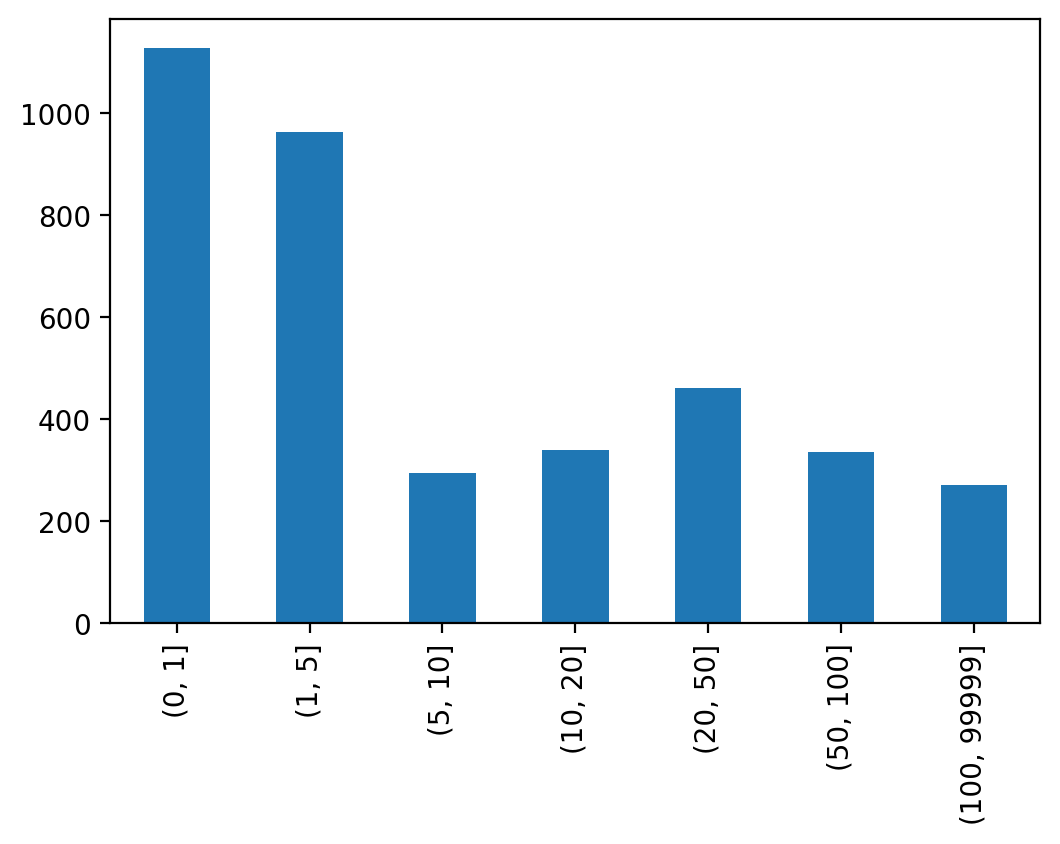

In [18]:
# グラフで確認
pd.cut(
    df3["sample"], [0, 1, 5, 10, 20, 50, 100, 99999]
).value_counts().sort_index().plot.bar()

In [19]:
# 市区町村は昇順、sampleは降順で並び替え
df3.sort_values(["JCODE", "sample"], ascending=[True, False], inplace=True)

In [20]:
# 市区町村の上位3つを取得
df4 = df3.groupby(["JCODE"]).head(3).copy()

# 市区町村ごとに連番
df4["id"] = df4.groupby("JCODE").cumcount() + 1

In [21]:
# 縦持ちから横持ち
df5 = df4.pivot(index=["PREF", "KEN", "JCODE", "CITY"], columns=["id"], values=["area", "sample"]).astype("Int64")

In [22]:
# 列名を結合
df5.columns = df5.columns.map(lambda s: "{0}_{1}".format(*s))

In [23]:
df5.reset_index(inplace=True)

In [24]:
df5

,PREF,KEN,JCODE,CITY,area_1,area_2,area_3,sample_1,sample_2,sample_3
0,01,北海道,01101,札幌市中央区,1026,<NA>,<NA>,148,<NA>,<NA>
1,01,北海道,01102,札幌市北区,1026,1027,<NA>,118,1,<NA>
2,01,北海道,01103,札幌市東区,1026,64288,<NA>,139,1,<NA>
3,01,北海道,01104,札幌市白石区,1026,<NA>,<NA>,99,<NA>,<NA>
4,01,北海道,01105,札幌市豊平区,1026,<NA>,<NA>,85,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
1657,47,沖縄県,47328,中頭郡中城村,49153,<NA>,<NA>,3,<NA>,<NA>
1658,47,沖縄県,47329,中頭郡西原町,49153,<NA>,<NA>,15,<NA>,<NA>
1659,47,沖縄県,47348,島尻郡与那原町,49153,<NA>,<NA>,3,<NA>,<NA>
1660,47,沖縄県,47350,島尻郡南風原町,49153,<NA>,<NA>,25,<NA>,<NA>


In [25]:
df5.to_csv("result.csv")